# EDA - Credit Card Data
This notebook explores the bank transaction dataset.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure reports/figures directory exists
os.makedirs('../reports/figures', exist_ok=True)

# Load cleaned data
df = pd.read_csv('../data/processed/creditcard_cleaned.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Class Distribution

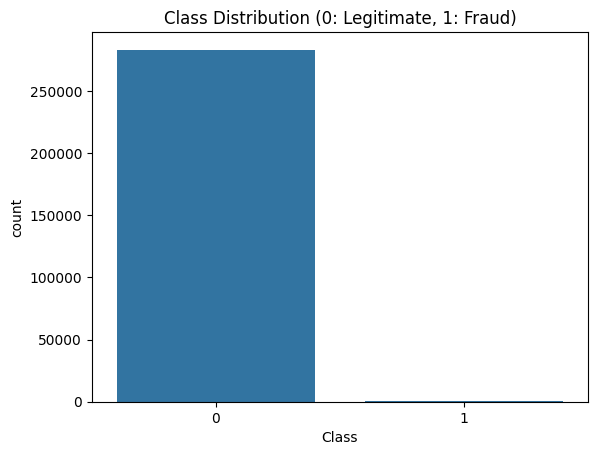

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [6]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.savefig('../reports/figures/creditcard_class_distribution.png')
plt.show()

print(df['Class'].value_counts(normalize=True))

## Transaction Amount Analysis

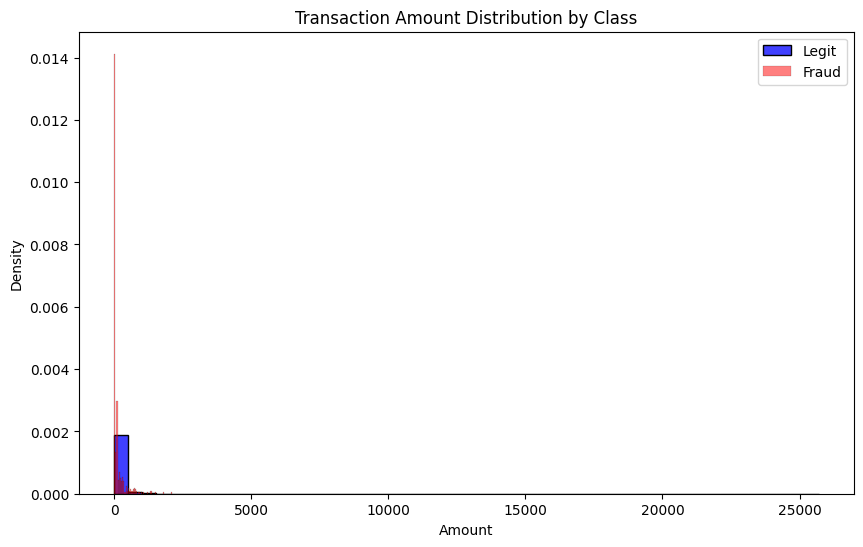

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', label='Legit', stat='density')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', stat='density', alpha=0.5)
plt.title('Transaction Amount Distribution by Class')
plt.legend()
plt.savefig('../reports/figures/creditcard_amount_distribution.png')
plt.show()

## PCA Features Analysis (V1-V28)

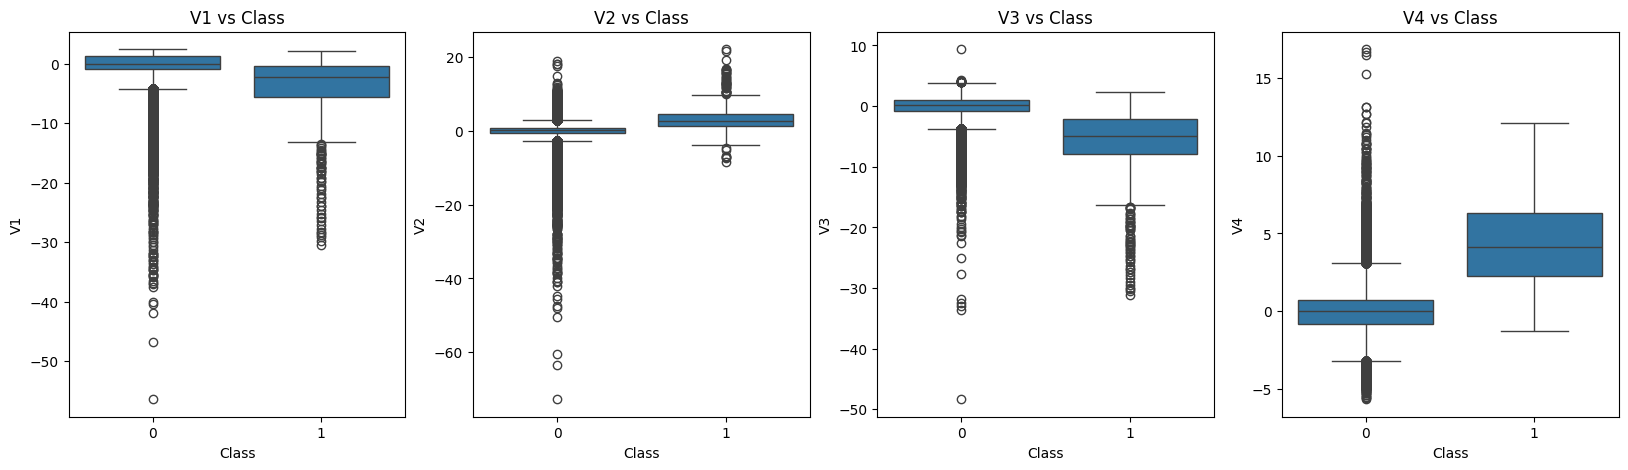

In [8]:
# Plotting first few PCA components
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i in range(1, 5):
    sns.boxplot(x='Class', y=f'V{i}', data=df, ax=axes[i-1])
    axes[i-1].set_title(f'V{i} vs Class')
plt.savefig('../reports/figures/creditcard_pca_features.png')
plt.show()